## Analyzing New York Red Bulls 2024 Performance in MLS Games

## Context
The New York Red Bulls, aka RBNY, are one of the teams in Major League Soccer (MLS). They are one of the ten charter clubs of MLS, having competed in the league since its founding in 1996.

 vs NYCFC game?

1. Performance of team across years: dot plot of goals/games across years. the question, are they improving overall as a team.
2. Gather info across the years to see what characteristics for attackers, defenders, midfielders allows for higher goal scoring. 3 Heat maps. 
3. on an individual basis, how can these characteristics help the players improve. do they have values that are outliers which they should focus on.
4. tableau dashboard.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Load all data

In [48]:
all_data = {}

for year in range(2010, 2025):
    file_path = f"RBNY_yearly_stats/main_stats/all_{year}_stats.xlsx"
    sheets = pd.ExcelFile(file_path).sheet_names  # Get all sheet names
    
    # Load sheets with different skiprows based on sheet name
    dataframes = {
        f"{sheet}_{year}": pd.read_excel(file_path, sheet_name=sheet, skiprows=1 if sheet.lower() == "score" else 2)
        for sheet in sheets
    }
    
    all_data.update(dataframes)  # Store in the main dictionary    

## Team performance across years


Question: Is the performance of RBNY team improving over the years?



Analysis: The points per game (PPG) have been calculated from 2010 to 2024 which is a measure to assess the teams performance. 

$$
\displaystyle
ppg = \frac{3 \cdot \sum win + \sum draw}{\sum game}
$$

Finding: No overall improvement has been noted. However, the two extreme points were 2018 with high result (2.10 ppg) and 2023 with bad result (1.24 ppg). Lets evaluate what factors might have contributed to such different results.

Calculating team performance across years

In [14]:
# Function to calculate PPG for a given DataFrame
def ppg_calculation(ppg_data, df, year):
    wins = (df["Result"] == "W").sum()
    draws = (df["Result"] == "D").sum()
    games = len(df)

    if games > 0:
        ppg_data[year] = (3 * wins + draws) / games
    else:
        ppg_data[year] = None  # If no games, set PPG as None

In [15]:
# Dictionary to store PPG values
ppg_data = {}

# Iterate over the years to calculate PPG
for year in range(2010, 2025):
    sheet_name = f"score_{year}"  # The sheet name with the year appended

    if sheet_name in all_data:  # Ensure the sheet exists
        df = all_data[sheet_name]

        if "Result" in df.columns:
            df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
            ppg_calculation(ppg_data, df, year)  # Pass the correct arguments
        else:
            ppg_data[year] = None  # If "Result" column is missing, set PPG as None



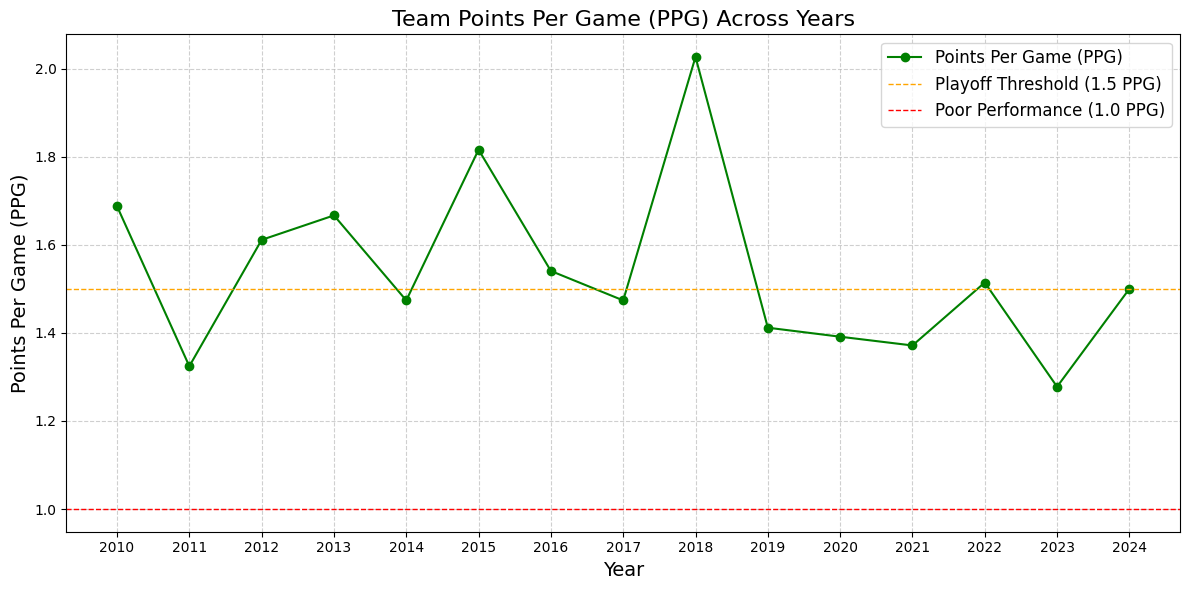

In [16]:
# Convert to DataFrame for plotting
ppg_df = pd.DataFrame(list(ppg_data.items()), columns=["Year", "PPG"])

# Plot PPG over the years
plt.figure(figsize=(12, 6))
plt.plot(ppg_df["Year"], ppg_df["PPG"], marker='o', linestyle='-', color='green', label="Points Per Game (PPG)")
plt.axhline(1.5, color='orange', linestyle='--', linewidth=1, label="Playoff Threshold (1.5 PPG)")
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label="Poor Performance (1.0 PPG)")
plt.title("Team Points Per Game (PPG) Across Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Points Per Game (PPG)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(ppg_df["Year"])
plt.tight_layout()
plt.show()


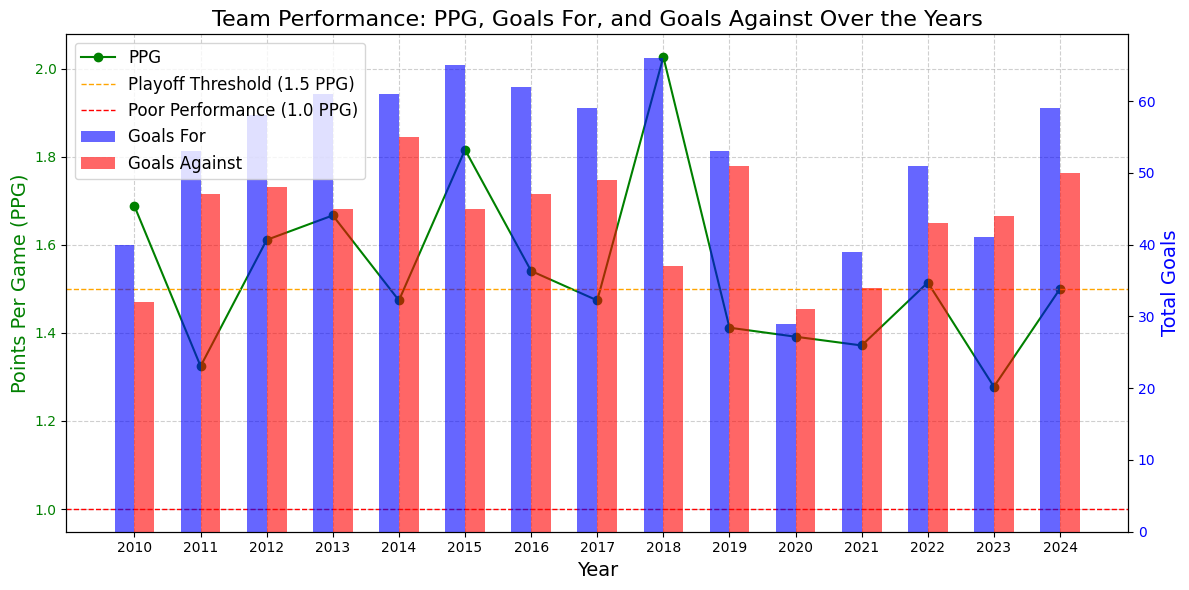

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store performance metrics
ppg_data = {}
goals_for_data = {}
goals_against_data = {}

# Iterate over the years to calculate PPG, GF, and GA
for year in range(2010, 2025):
    sheet_name = f"score_{year}"  # Sheet name with year appended

    if sheet_name in all_data:  # Ensure the sheet exists
        df = all_data[sheet_name]

        if "Result" in df.columns:
            df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
            ppg_calculation(ppg_data, df, year)  # Calculate PPG

        # Check if GF and GA exist
        if "GF" in df.columns and "GA" in df.columns:
            df["GF"] = pd.to_numeric(df["GF"], errors="coerce")  # Convert to numeric
            df["GA"] = pd.to_numeric(df["GA"], errors="coerce")
            goals_for_data[year] = df["GF"].sum()  # Total GF per year
            goals_against_data[year] = df["GA"].sum()  # Total GA per year
        else:
            goals_for_data[year] = None
            goals_against_data[year] = None

# Convert to DataFrame for plotting
df_plot = pd.DataFrame({
    "Year": list(ppg_data.keys()),
    "PPG": list(ppg_data.values()),
    "Goals For": list(goals_for_data.values()),
    "Goals Against": list(goals_against_data.values()),
})

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PPG as a line graph
ax1.plot(df_plot["Year"], df_plot["PPG"], marker='o', linestyle='-', color='green', label="PPG")
ax1.axhline(1.5, color='orange', linestyle='--', linewidth=1, label="Playoff Threshold (1.5 PPG)")
ax1.axhline(1.0, color='red', linestyle='--', linewidth=1, label="Poor Performance (1.0 PPG)")
ax1.set_ylabel("Points Per Game (PPG)", fontsize=14, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Secondary y-axis for Goals For & Goals Against
ax2 = ax1.twinx()
width = 0.3  # Bar width

# Plot GF and GA as bar graphs
ax2.bar(df_plot["Year"] - width/2, df_plot["Goals For"], width=width, color='blue', alpha=0.6, label="Goals For")
ax2.bar(df_plot["Year"] + width/2, df_plot["Goals Against"], width=width, color='red', alpha=0.6, label="Goals Against")

ax2.set_ylabel("Total Goals", fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Titles and grid
plt.title("Team Performance: PPG, Goals For, and Goals Against Over the Years", fontsize=16)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=12, loc="upper left")

plt.xticks(df_plot["Year"])
plt.tight_layout()
plt.show()



Columns in standard_stats_2010: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2011: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2012: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'Matches'],
      dtype='object')

Columns in standard_stats_2013: Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK'

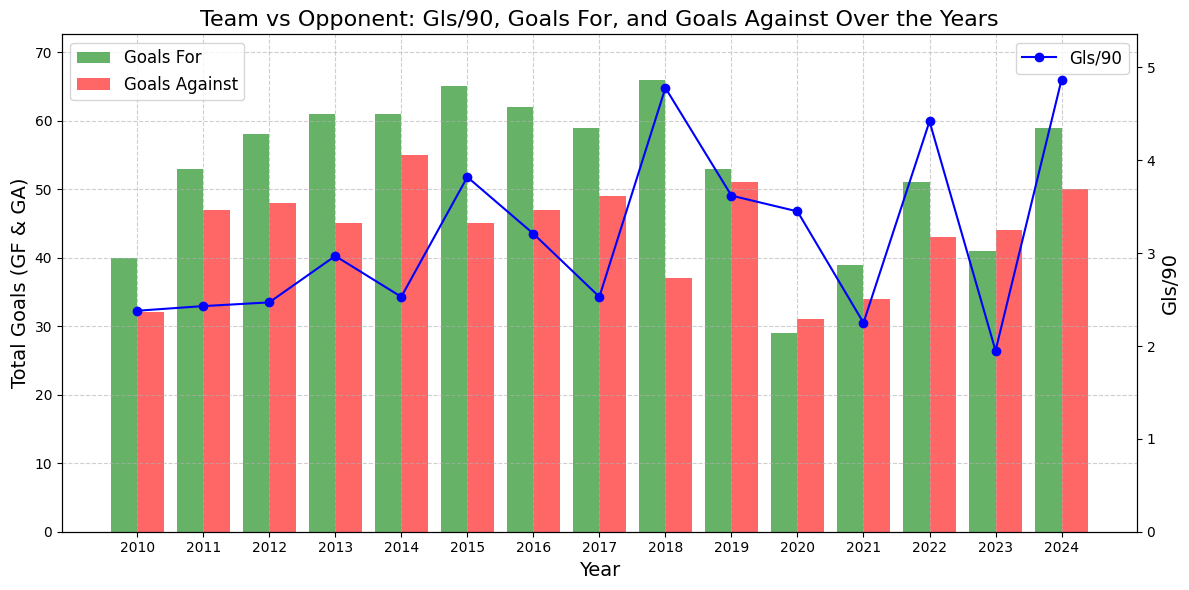

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated dictionaries for data
goals_for_data = {}  # GF for the team
goals_against_data = {}  # GA for the team
gls_1_data = {}  # Gls.1 for the team

# Iterate over the years to calculate the sum of G+A (goals plus assist), GF, and GA for the team
for year in range(2010, 2025):
    standard_stats_sheet = f"standard_stats_{year}"  # standard_stats_* sheet for G+A
    score_sheet = f"score_{year}"  # score_* sheet for GF and GA
    
    if standard_stats_sheet in all_data:  # Ensure the standard_stats_* sheet exists
        df = all_data[standard_stats_sheet]
        print(f"\nColumns in {standard_stats_sheet}:", df.columns)  # Debugging check
        
        # Extract Gls.1 (Fixed issue)
        if "Gls.1" in df.columns:  # **Corrected column check**
            df["Gls.1"] = pd.to_numeric(df["Gls.1"], errors="coerce")  # Convert to numeric
            gls_1_data[year] = df["Gls.1"].sum() if not df["Gls.1"].isnull().all() else 0  
        else:
            gls_1_data[year] = 0
    
    if score_sheet in all_data:  # Ensure the score_* sheet exists
        df = all_data[score_sheet]

        # Ensure the GF and GA columns exist in the score sheet
        if "GF" in df.columns and "GA" in df.columns:
            df["GF"] = pd.to_numeric(df["GF"], errors="coerce")  # Convert to numeric
            df["GA"] = pd.to_numeric(df["GA"], errors="coerce")
            goals_for_data[year] = df["GF"].sum()  # Sum GF for the year
            goals_against_data[year] = df["GA"].sum()  # Sum GA for the year
        else:
            goals_for_data[year] = None
            goals_against_data[year] = None


# Convert to DataFrame for plotting
df_plot = pd.DataFrame({
    "Year": list(goals_for_data.keys()),
    "Gls/90": list(gls_1_data.values()),
    "Goals For": list(goals_for_data.values()),
    "Goals Against": list(goals_against_data.values())
})

# Print to check if data is correctly prepared for plotting
print("\nData for plotting:")
print(df_plot)

# Check if any G+A, GF, or GA values are None or NaN
if df_plot["Gls/90"].isnull().all() or df_plot["Goals For"].isnull().all() or df_plot["Goals Against"].isnull().all():
    print("No valid data to plot!")

# Set the width for bar plots
width = 0.4

# Create figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Goals For and Goals Against as bar graphs on ax1
ax1.bar(df_plot["Year"] - width/2, df_plot["Goals For"], width=width, color='green', alpha=0.6, label="Goals For")
ax1.bar(df_plot["Year"] + width/2, df_plot["Goals Against"], width=width, color='red', alpha=0.6, label="Goals Against")

# Create secondary axis for Gls/90 line plot (independent y-axis)
ax2 = ax1.twinx()

# Plot Gls/90 as a line graph with dots on ax2
ax2.plot(df_plot["Year"], df_plot["Gls/90"], marker='o', linestyle='-', color='blue', label="Gls/90")

# **Handle NaN values before finding y-axis limits**
df_plot = df_plot.fillna(0)  # Replace NaN with 0 to prevent errors

# Find y-axis limits for Goals For & Goals Against (ax1)
y_min1 = df_plot[["Goals For", "Goals Against"]].min().min()
y_max1 = df_plot[["Goals For", "Goals Against"]].max().max()
y_max1 += y_max1 * 0.1  # Adding 10% buffer

# Find y-axis limits for Gls/90 (ax2) and apply a buffer (e.g., 10%)
y_min2 = df_plot["Gls/90"].min()
y_max2 = df_plot["Gls/90"].max()
y_max2 += y_max2 * 0.1  # Adding 10% buffer for Gls/90

# Set y_min to 0 for both axes
y_min = 0

# Apply the y-axis limits to both axes
ax1.set_ylim(y_min, y_max1)
ax2.set_ylim(y_min, y_max2)

# Set labels and title
ax1.set_ylabel("Total Goals (GF & GA)", fontsize=14)
ax2.set_ylabel("Gls/90", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

# Title and legends
plt.title("Team vs Opponent: Gls/90, Goals For, and Goals Against Over the Years", fontsize=16)
plt.xticks(df_plot["Year"])
ax1.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)

# Tight layout for better spacing
plt.tight_layout()
plt.show()



Use the same data but divided the amount of 90 minutes. certain years have played less games like 2020 and 2021 with covid.

## Understanding the Performance Gap from 2018 to 2024

Analysis: 
- Determine whether there is a significant difference in team metrics between 2018 and 2024. The analysis will categorize metrics based on player positions—attacker, midfielder, defender, and goalkeeper—since each role has specific performance indicators.
- Calculate the average and standard deviation for all metrics from both the 2018 and 2024 data sets. This data will be segmented by player roles to provide a visual representation, ensuring that any significant differences observed are meaningful and intuitive.

In [19]:
# display all columns
pd.set_option('display.max_columns', None)


Set all sheets from 2018 and 2024 RBNY Stats into dataframe

In [20]:
# Print loaded DataFrame names for reference
print("Loaded DataFrames:")
for df_name in all_data.keys():
    print(df_name)

# Example: Access a specific DataFrame
# For example, general_stats_2018 or general_stats_2024
general_stats_2018 = all_data.get("standard_stats_2018")
general_stats_2024 = all_data.get("standard_stats_2024")


Loaded DataFrames:
standard_stats_2010
score_2010
goalkeeping_2010
shooting_2010
miscellaneous_2010
standard_stats_2011
score_2011
goalkeeping_2011
shooting_2011
miscellaneous_2011
standard_stats_2012
score_2012
goalkeeping_2012
shooting_2012
miscellaneous_2012
standard_stats_2013
score_2013
goalkeeping_2013
shooting_2013
miscellaneous_2013
standard_stats_2014
score_2014
goalkeeping_2014
shooting_2014
miscellaneous_2014
standard_stats_2015
score_2015
goalkeeping_2015
shooting_2015
miscellaneous_2015
standard_stats_2016
score_2016
goalkeeping_2016
scoring_2016
miscenalleous_2016
standard_stats_2017
score_2017
goalkeeping_2017
shooting_2017
miscenallenous_2017
standard_stats_2018
score_2018
goalkeeping_2018
advanced_goalkeeping_2018
shooting_2018
passing_2018
pass_types_2018
shot_creation_2018
defensive_action_2018
possession_2018
playing_time_2018
miscellaneous_2018
standard_stats_2019
score_2019
goalkeeping_2019
advanced_goalkeeping_2019
shooting_2019
passing_2019
defensive_action_2019

In [57]:
# Identify the general stats columns (from the first sheet)
general_stats_2018_cols = set(all_data.get("standard_stats_2018", pd.DataFrame()).columns)
general_stats_2024_cols = set(all_data.get("standard_stats_2024", pd.DataFrame()).columns)

# Drop Pos because it must be kept in all sheets
general_stats_2018_cols = [col for col in general_stats_2018_cols if col not in {"Pos", "Player"}]
general_stats_2024_cols = [col for col in general_stats_2024_cols if col not in {"Pos", "Player"}]

print(general_stats_2018_cols)


['G+A', 'PKatt', 'xG+xAG', 'Ast', 'Gls.1', 'Ast.1', 'Min', 'PrgC', 'G-PK', 'xG', 'G+A-PK', 'G+A.1', 'Starts', 'xAG.1', 'PK', 'Matches', 'npxG+xAG', 'npxG', 'xAG', '90s', 'Age', 'Gls', 'PrgP', 'xG.1', 'Nation', 'CrdR', 'npxG+xAG.1', 'CrdY', 'G-PK.1', 'MP', 'PrgR', 'npxG.1']


Remove repeating columns in different sheets

In [56]:
# Create a new dictionary for non-repeating columns
filtered_data = {}

for df_name, df in all_data.items():
    # Only keep data from 2018 and 2024
    if "2018" not in df_name and "2024" not in df_name:
        continue  # Skip any other years

    # Always keep the general stats sheets for these years
    if df_name in ["standard_stats_2018", "standard_stats_2024"]:
        filtered_data[df_name] = df
        continue

    # Identify non-repeating columns based on the respective general stats columns
    reference_cols = general_stats_2018_cols if "2018" in df_name else general_stats_2024_cols
    non_repeating_cols = [col for col in df.columns if col not in reference_cols]

    # Store only the unique columns in the new DataFrame
    filtered_data[df_name] = df[non_repeating_cols]

# Print filtered DataFrame names
print("Filtered DataFrames (2018 & 2024, without repeating columns):")
for df_name, df in filtered_data.items():
    print(df_name, df.shape)


Filtered DataFrames (2018 & 2024, without repeating columns):
standard_stats_2018 (31, 34)
score_2018 (38, 19)
goalkeeping_2018 (2, 16)
advanced_goalkeeping_2018 (2, 27)
shooting_2018 (29, 14)
passing_2018 (29, 22)
pass_types_2018 (29, 17)
shot_creation_2018 (29, 18)
defensive_action_2018 (29, 18)
possession_2018 (29, 22)
playing_time_2018 (31, 20)
miscellaneous_2018 (29, 16)
standard_stats_2024 (33, 34)
score_2024 (38, 19)
goalkeeping_2024 (2, 16)
advanced_goalkeeping_2024 (2, 27)
shooting_2024 (27, 14)
passing_2024 (27, 22)
pass_types_2024 (26, 17)
shot_creation_2024 (27, 18)
defensive_action_2024 (27, 18)
possession_2024 (27, 22)
playing_time_2024 (33, 20)
miscellaneous_2024 (27, 16)


In [36]:
for df_name, df in filtered_data.items():
    print(f"Columns in {df_name}:")
    print(df.head())
    print("-" * 50)

Columns in standard_stats_2018:
        Player  Nation Pos  Age  MP  Starts     Min   90s  Gls   Ast   G+A  \
0   Aaron Long  us USA  DF   25  34      31  2808.0  31.2  3.0   1.0   4.0   
1  Luis Robles  us USA  GK   33  31      31  2790.0  31.0  0.0   0.0   0.0   
2   Sean Davis  us USA  MF   24  32      30  2574.0  28.6  0.0   4.0   4.0   
3   Tim Parker  us USA  DF   24  29      29  2610.0  29.0  1.0   2.0   3.0   
4         Kaku  py PAR  MF   23  30      29  2410.0  26.8  6.0  10.0  16.0   

   G-PK   PK  PKatt  CrdY  CrdR   xG  npxG  xAG  npxG+xAG  PrgC   PrgP   PrgR  \
0   3.0  0.0    0.0   1.0   0.0  2.6   2.6  0.5       3.1   4.0   97.0    8.0   
1   0.0  0.0    0.0   1.0   0.0  0.0   0.0  0.3       0.3   0.0    0.0    0.0   
2   0.0  0.0    0.0   1.0   0.0  0.4   0.4  3.6       4.0  24.0  202.0   42.0   
3   1.0  0.0    0.0   5.0   0.0  2.9   2.9  1.1       4.0   4.0  101.0    4.0   
4   4.0  2.0    3.0   5.0   0.0  7.1   4.7  7.2      11.9  43.0  242.0  191.0   

   Gls.1  As

Determine which metrics are significantly different from 2018 and 2024 data

Analysis:
- Part 1: 
        H0: No significant difference exists between the 2018 and 2024 metrics
        H1: A significant difference exists between 2018 and 2024 metrics

- Part 2: 
        H0: No significant difference exists between the players roles (either attacker, defender, or midfielder) of 2018 and 2024 data
        H1: A singificant difference exists between the players roles of 2018 and 2024 data 
        - Goalkeeper: for the goalkeepers it would have been ideal to calculate for a signficant difference between 2018 and 2024 for the metrics in "goalkeeping", "advanced_goalkeeping" and "standard_stats" sheets. However, statistical tests are only meaningful with a MINIMUM of 3-5 samples, whereas we only have 2 players for each year (2 samples).


Helper functions performing statistical analysis

Statistical analysis between 2018 and 2024 data

In [55]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Excluded sheets
EXCLUDED_SHEETS = {"goalkeeping", "advanced_goalkeeping"}

# Function to filter and merge data
def filter_and_merge_data(filtered_data, year_extraction=True):
    all_data = []

    for df_name, df in filtered_data.items():
        sheet_base_name = "_".join(df_name.split("_")[:-1])

        if sheet_base_name in EXCLUDED_SHEETS:
            print(f"⏩ Skipping sheet: {df_name}")
            continue

        year = 2018 if "2018" in df_name else 2024 if year_extraction else None
        df = df.copy()
        df.loc[:, "Year"] = year  

        all_data.append(df)

    return pd.concat(all_data, ignore_index=True) if all_data else None

# Function to check normality
def check_normality(data):
    if len(data) < 3: 
        return None
    if data.nunique() == 1: 
        return True  
    return shapiro(data)[1] >= 0.05  

# Function to check variance
def check_variance(data1, data2):
    return levene(data1, data2)[1] < 0.05  

# Function to select statistical test
def select_statistical_test(values_2018, values_2024):
    normality_2018 = check_normality(values_2018)
    normality_2024 = check_normality(values_2024)
    
    normality_violated = (normality_2018 is not None and not normality_2018) or \
                         (normality_2024 is not None and not normality_2024)

    variance_violated = check_variance(values_2018, values_2024)

    if not normality_violated and not variance_violated:
        return ttest_ind(values_2018, values_2024, equal_var=True, nan_policy="omit"), "T-Test (Equal Var)"
    elif not normality_violated and variance_violated:
        return ttest_ind(values_2018, values_2024, equal_var=False, nan_policy="omit"), "Welch’s T-Test"
    else:
        return mannwhitneyu(values_2018, values_2024, alternative="two-sided"), "Mann-Whitney U Test"

# Function to perform statistical analysis
def perform_statistical_analysis(df_2018, df_2024, filename):
    numeric_cols = [col for col in df_2018.select_dtypes(include=["number"]).columns if col != "Year"]

    results = []
    assumption_violations = {}

    for metric in numeric_cols:
        values_2018, values_2024 = df_2018[metric].dropna(), df_2024[metric].dropna()

        if len(values_2018) < 3 or len(values_2024) < 3:
            print(f"⚠️ Skipping {metric} (Not enough data)")
            continue  

        (statistic, p_val), test_name = select_statistical_test(values_2018, values_2024)

        normality_violated = not check_normality(values_2018) or not check_normality(values_2024)
        variance_violated = check_variance(values_2018, values_2024)

        if normality_violated or variance_violated:
            assumption_violations[metric] = {"normality": normality_violated, "variance": variance_violated}

        results.append({
            "Metric": metric, 
            "Avg_Diff": values_2018.mean() - values_2024.mean(), 
            "p-value": p_val, 
            "Test Used": test_name
        })

    if results:
        comparison_df = pd.DataFrame(results)
        comparison_df["Significant"] = comparison_df["p-value"] < 0.05  # Create the 'Significant' column only after results are available
        significant_diffs = comparison_df[comparison_df["Significant"]]

        # Save the significant differences to CSV
        significant_diffs.to_csv(filename, index=False)
        print(f"\n✅ {len(significant_diffs)} significant differences found. Results saved to {filename}.")

        if assumption_violations:
            print("\n⚠️ Assumption violations detected:")
            for metric, issues in assumption_violations.items():
                print(f" - {metric}: Normality violated? {issues['normality']}, Variance violated? {issues['variance']}")

        return significant_diffs
    else:
        print("⚠️ No significant results found.")
        return pd.DataFrame()  # Return an empty DataFrame in case of no results



In [54]:
# Main execution for yearly comparison
merged_df = filter_and_merge_data(filtered_data)
if merged_df is not None:
    perform_statistical_analysis(
        merged_df[merged_df["Year"] == 2018], 
        merged_df[merged_df["Year"] == 2024], 
        "RBNY_yearly_stats/significance/yearly_significant_diff.csv"
    )

⏩ Skipping sheet: goalkeeping_2021
⏩ Skipping sheet: advanced_goalkeeping_2021
⏩ Skipping sheet: goalkeeping_2024
⏩ Skipping sheet: advanced_goalkeeping_2024
⚠️ Skipping GF (Not enough data)
⚠️ Skipping GA (Not enough data)
⚠️ Skipping xGA (Not enough data)
⚠️ Skipping Poss (Not enough data)
⚠️ Skipping Attendance (Not enough data)
⚠️ Skipping Sh (Not enough data)
⚠️ Skipping SoT (Not enough data)
⚠️ Skipping SoT% (Not enough data)
⚠️ Skipping Sh/90 (Not enough data)
⚠️ Skipping SoT/90 (Not enough data)
⚠️ Skipping G/Sh (Not enough data)
⚠️ Skipping G/SoT (Not enough data)
⚠️ Skipping Dist (Not enough data)
⚠️ Skipping FK (Not enough data)
⚠️ Skipping npxG/Sh (Not enough data)
⚠️ Skipping G-xG (Not enough data)
⚠️ Skipping np:G-xG (Not enough data)
⚠️ Skipping Cmp (Not enough data)
⚠️ Skipping Att (Not enough data)
⚠️ Skipping Cmp% (Not enough data)
⚠️ Skipping TotDist (Not enough data)
⚠️ Skipping PrgDist (Not enough data)
⚠️ Skipping Cmp.1 (Not enough data)
⚠️ Skipping Att.1 (Not eno

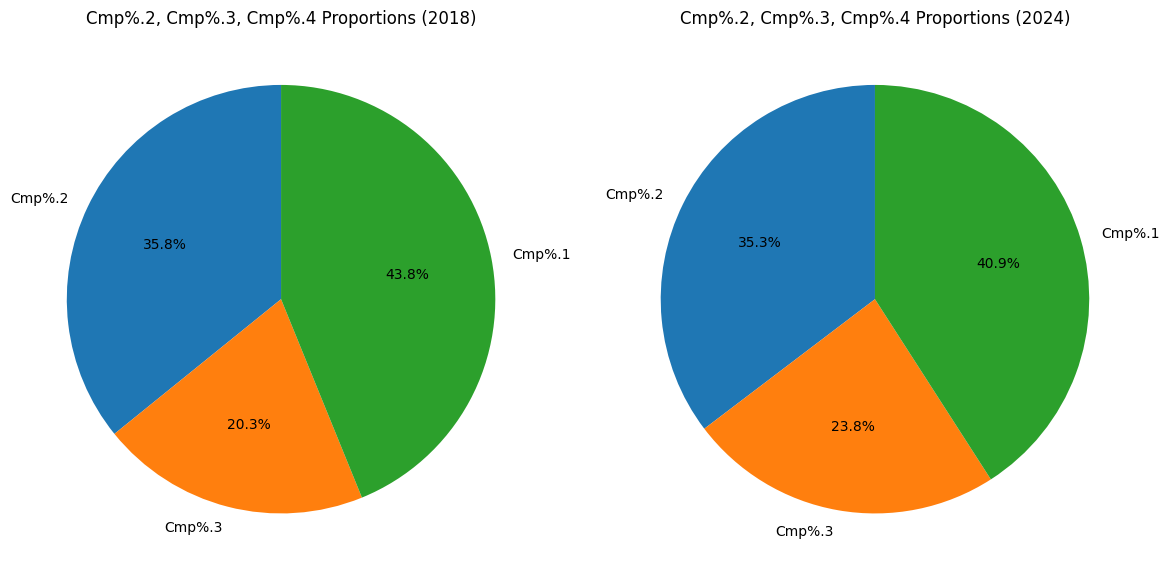

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define metrics for pie charts
pie_metrics = ["Cmp%.2", "Cmp%.3", "Cmp%.1"]

# Dictionary to store aggregated values
yearly_totals = {2018: {metric: 0 for metric in pie_metrics}, 
                 2024: {metric: 0 for metric in pie_metrics}}

# Process only the "passing" sheet
for df_name, df in filtered_data.items():
    if "passing" not in df_name.lower():  # Ensure we only process "passing" sheet
        continue  

    year = 2018 if "2018" in df_name else 2024  # Extract year

    # Sum values for each metric
    for metric in pie_metrics:
        if metric in df.columns:
            yearly_totals[year][metric] += df[metric].sum()

# Convert dictionary to DataFrame
pie_data = pd.DataFrame(yearly_totals)

# Define color scheme
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Create subplots for 2018 and 2024
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for 2018
axes[0].pie(
    pie_data[2018], labels=pie_metrics, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[0].set_title("Cmp%.2, Cmp%.3, Cmp%.4 Proportions (2018)")

# Plot pie chart for 2024
axes[1].pie(
    pie_data[2024], labels=pie_metrics, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[1].set_title("Cmp%.2, Cmp%.3, Cmp%.4 Proportions (2024)")

# Display charts
plt.tight_layout()
plt.show()



🚨 Outliers Detected:
📌 Sheet: score_2018 | Player: Unknown | Metric: Poss | Outlier Value: 35
📌 Sheet: score_2018 | Player: Unknown | Metric: Poss | Outlier Value: 70
📌 Sheet: passing_2018 | Player: Brian White | Metric: Cmp% | Outlier Value: 50.0
📌 Sheet: passing_2018 | Player: Andreas Ivan | Metric: Cmp% | Outlier Value: 50.7
📌 Sheet: passing_2018 | Player: Ben Mines | Metric: Cmp% | Outlier Value: 48.0
📌 Sheet: passing_2018 | Player: Stefano Bonomo | Metric: Cmp% | Outlier Value: 100.0
📌 Sheet: passing_2018 | Player: Stefano Bonomo | Metric: Cmp%.2 | Outlier Value: 0.0
📌 Sheet: passing_2018 | Player: Stefano Bonomo | Metric: Cmp%.3 | Outlier Value: 0.0
📌 Sheet: score_2024 | Player: Unknown | Metric: Poss | Outlier Value: 70
📌 Sheet: passing_2024 | Player: Aidan O'Connor | Metric: Cmp% | Outlier Value: 28.6
📌 Sheet: passing_2024 | Player: Roald Mitchell | Metric: Cmp% | Outlier Value: 33.3
📌 Sheet: passing_2024 | Player: Mohammed Sofo | Metric: Cmp%.2 | Outlier Value: 0.0
📌 Sheet: p

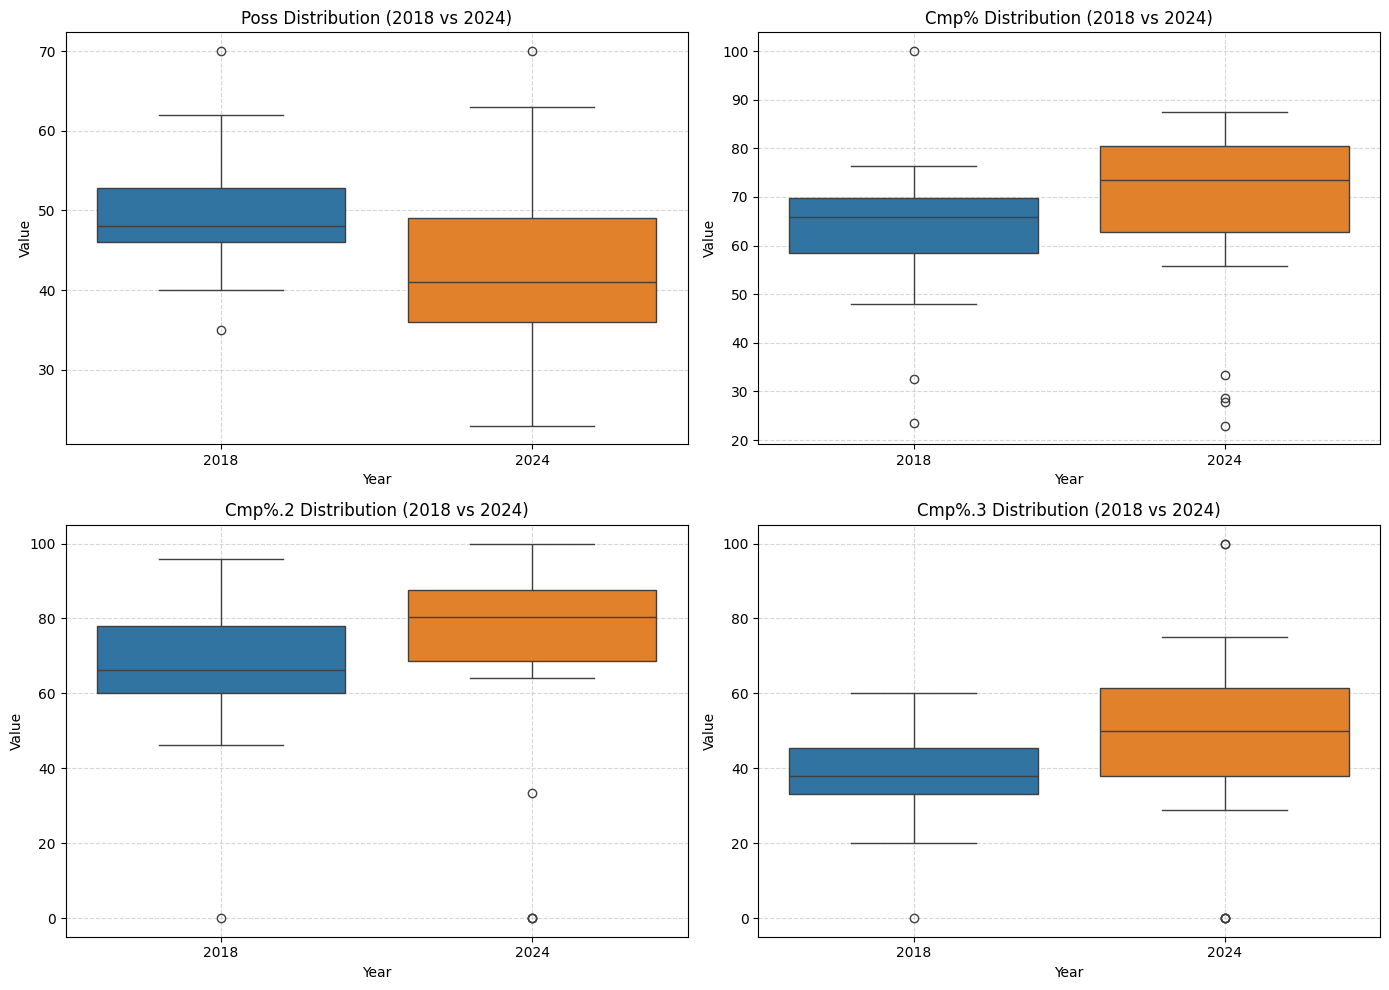

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load filtered data
all_metrics = ["Poss", "Cmp%", "Cmp%.2", "Cmp%.3"]
boxplot_data = []
outlier_instances = []

# Process each dataset
for df_name, df in filtered_data.items():
    year = 2018 if "2018" in df_name else 2024  # Extract year

    # Filter only relevant metrics
    for metric in all_metrics:
        if metric in df.columns:
            metric_values = df[metric].dropna()

            # Compute Q1, Q3, and IQR for outlier detection
            Q1 = metric_values.quantile(0.25)
            Q3 = metric_values.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

            # Store all data for boxplot
            for index, value in metric_values.items():
                player = df.loc[index, "Player"] if "Player" in df.columns else "Unknown"
                boxplot_data.append({"Metric": metric, "Player": player, "Year": year, "Value": value})

                # Detect outliers
                if value < lower_bound or value > upper_bound:
                    outlier_instances.append({"Sheet": df_name, "Player": player, "Metric": metric, "Outlier Value": value})

# Print outliers
if outlier_instances:
    print("\n🚨 Outliers Detected:")
    for outlier in outlier_instances:
        print(f"📌 Sheet: {outlier['Sheet']} | Player: {outlier['Player']} | "
              f"Metric: {outlier['Metric']} | Outlier Value: {outlier['Outlier Value']}")
else:
    print("\n✅ No outliers detected.")

# Convert to DataFrame for visualization
boxplot_df = pd.DataFrame(boxplot_data)

# Set up subplots for 4 metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
custom_palette = {2018: "#1f77b4", 2024: "#ff7f0e"}  # Blue for 2018, Orange for 2024

# Define plot positions
metric_positions = {
    "Poss": (0, 0),
    "Cmp%": (0, 1),
    "Cmp%.2": (1, 0),
    "Cmp%.3": (1, 1)
}

# Create a boxplot for each metric
for metric, pos in metric_positions.items():
    if metric in boxplot_df["Metric"].unique():
        sns.boxplot(
            x="Year", y="Value", hue="Year", data=boxplot_df[boxplot_df["Metric"] == metric],
            ax=axes[pos], palette=custom_palette, legend=False  # Fix for Seaborn 0.14+ 
        )
        axes[pos].set_title(f"{metric} Distribution (2018 vs 2024)")
        axes[pos].set_xlabel("Year")
        axes[pos].set_ylabel("Value")
        axes[pos].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

Statistical analysis between each players' roles for 2018 and 2024 metrics.

In [41]:
# Main execution for role-based comparison
role_mappings = {
    "Attacker": ["FW", "AM", "LW", "RW"],
    "Midfielder": ["MF", "DM", "CM", "LM", "RM", "WM"],
    "Defender": ["DF", "FB", "LB", "RB", "CB"],
}

role_sheets = {
    "Attacker": ["standard_stats", "shooting", "possession", "passing", "pass_types", "shot_creation", "playing_time", "miscellaneous"],
    "Defender": ["standard_stats", "defensive_action", "possession", "passing", "pass_types", "shot_creation", "playing_time", "miscellaneous"],
    "Midfielder": ["standard_stats", "passing", "possession", "defensive_action", "pass_types", "shot_creation", "playing_time", "miscellaneous"]
}

for role, sheets in role_sheets.items():
    role_data = []

    for df_name, df in filtered_data.items():
        sheet_base_name = "_".join(df_name.split("_")[:-1])
        if sheet_base_name not in sheets or "Pos" not in df.columns:
            continue  

        positions = role_mappings[role]
        df_filtered = df[df["Pos"].apply(lambda x: any(pos in str(x).split(",") for pos in positions))].copy()
        df_filtered.loc[:, "Year"] = 2018 if "2018" in df_name else 2024
        role_data.append(df_filtered)

    if not role_data:
        print(f"⚠️ No data found for {role}, skipping.")
        continue

    role_df = pd.concat(role_data, ignore_index=True)

    perform_statistical_analysis(
        role_df[role_df["Year"] == 2018], 
        role_df[role_df["Year"] == 2024], 
        f"RBNY_yearly_stats/significance/{role.lower()}_significant_diff.csv"
    )


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3361: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_morestats.py:3361: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom



✅ 4 significant differences found. Results saved to RBNY_yearly_stats/significance/attacker_significant_diff.csv.

⚠️ Assumption violations detected:
 - MP: Normality violated? True, Variance violated? False
 - Starts: Normality violated? True, Variance violated? False
 - Min: Normality violated? True, Variance violated? False
 - 90s: Normality violated? True, Variance violated? False
 - Gls: Normality violated? True, Variance violated? False
 - Ast: Normality violated? True, Variance violated? False
 - G+A: Normality violated? True, Variance violated? False
 - G-PK: Normality violated? True, Variance violated? False
 - PK: Normality violated? True, Variance violated? False
 - PKatt: Normality violated? True, Variance violated? False
 - CrdY: Normality violated? True, Variance violated? False
 - CrdR: Normality violated? True, Variance violated? False
 - xG: Normality violated? True, Variance violated? False
 - npxG: Normality violated? True, Variance violated? False
 - xAG: Normality

Analysis: 
- Calculate the average and standard deviation for all metrics from both 2018 and 2024 files. This data will be segmented for each player roles as each roles are expected to contribute differently to the game. As such, certain roles have specific metrics at which they need to perform.

Segment and average all metrics from 2018 and 2024 files based on player roles (attackers, midfielder, defenders, goalkeeper)


Visualize the significant metrics averages based on their roles

- attacker: Cmp%.2
- defender: Carries, TotDist, Rec
- midfielder: Cmp%, Cmp%.2, Cmp%.3 
- goalkeeper: none


🚨 Outliers Detected:
📌 Sheet: passing_2018 | Player: Brian White | Metric: Cmp% | Outlier Value: 50.0
📌 Sheet: passing_2018 | Player: Andreas Ivan | Metric: Cmp% | Outlier Value: 50.7
📌 Sheet: passing_2018 | Player: Ben Mines | Metric: Cmp% | Outlier Value: 48.0
📌 Sheet: passing_2018 | Player: Stefano Bonomo | Metric: Cmp% | Outlier Value: 100.0
📌 Sheet: pass_types_2018 | Player: Kaku | Metric: TB | Outlier Value: 20
📌 Sheet: pass_types_2018 | Player: Alex Muyl | Metric: TB | Outlier Value: 7
📌 Sheet: pass_types_2018 | Player: Florian Valot | Metric: TB | Outlier Value: 10
📌 Sheet: pass_types_2018 | Player: Sean Davis | Metric: Str | Outlier Value: 3
📌 Sheet: pass_types_2018 | Player: Marc Rzatkowski | Metric: Str | Outlier Value: 1
📌 Sheet: pass_types_2018 | Player: Vincent Bezecourt | Metric: Str | Outlier Value: 1
📌 Sheet: shot_creation_2018 | Player: Kaku | Metric: SCA | Outlier Value: 117
📌 Sheet: shot_creation_2018 | Player: Kaku | Metric: PassLive | Outlier Value: 103
📌 Sheet: 

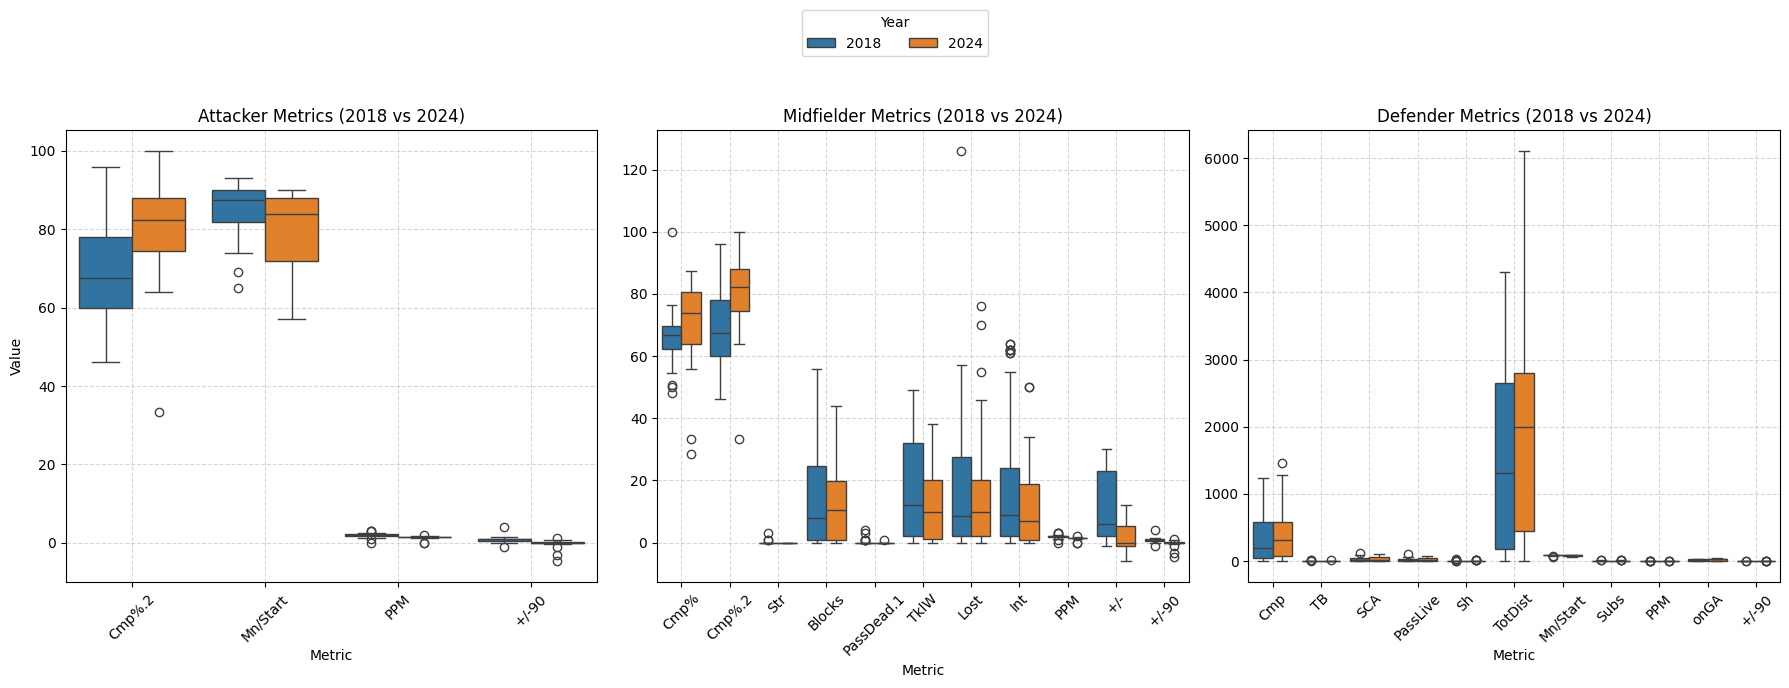

In [ ]:
# Role-based metrics selection
role_metrics = {
    "Defender": ["TotDist", "Cmp", 'TB', 'SCA', 'PassLive', 'Sh', 'Mn/Start', 'Subs', 'PPM', 'onGA', "+/-90"],
    "Midfielder": ["Cmp%", 'Cmp%.2', 'Str', 'Blocks', 'PassDead.1', 'TklW', 'Lost', 'Int', 'PPM', '+/-', '+/-90'],
    "Attacker": ["Cmp%.2", 'Mn/Start', 'PPM', '+/-90', ],
    "Goalkeeper": []
}

# Relevant sheets per role
role_sheets = {
    "Attacker": ["standard_stats", "shooting", "possession", "passing", 'pass_types', 'shot_creation', 'playing_time', 'miscellaneous'],
    "Defender": ["standard_stats", "defensive_action", "possession", 'pass_types', 'shot_creation', 'playing_time', 'miscellaneous'],
    "Midfielder": ["standard_stats", "passing", "possession", "defensive_action", 'pass_types', 'shot_creation', 'playing_time', 'miscellaneous'],
    "Goalkeeper": ["standard_stats", "goalkeeping", "advanced_goalkeeping", 'pass_types', 'shot_creation', 'playing_time', 'miscellaneous']
}

# Prepare data for box plots
boxplot_data = []
outlier_instances = []

# Loop through filtered data
for df_name, df in filtered_data.items():
    # Extract year from the df_name
    year = 2018 if "2018" in df_name else 2024

    # Identify the base sheet name (removing year suffix)
    sheet_base_name = "_".join(df_name.split("_")[:-1])

    # Loop through roles to check if this DataFrame is relevant
    for role, valid_sheets in role_sheets.items():
        if sheet_base_name not in valid_sheets:  # Skip irrelevant sheets
            continue
        if role not in role_metrics or not role_metrics[role]:  # Skip Goalkeeper (no metrics)
            continue

        # Check if the DataFrame contains the columns of interest
        for metric in role_metrics[role]:
            if metric in df.columns:
                metric_values = df[metric].dropna()

                # Calculate Q1, Q3, and IQR
                Q1 = metric_values.quantile(0.25)
                Q3 = metric_values.quantile(0.75)
                IQR = Q3 - Q1

                # Define outlier bounds
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                # Loop through values to detect outliers
                for index, value in metric_values.items():
                    player = df.loc[index, "Player"] if "Player" in df.columns else "Unknown"

                    # Store all data for boxplot (ensuring Player is saved)
                    boxplot_data.append({
                        "Role": role, "Metric": metric, "Player": player, "Year": year, "Value": value
                    })

                    # Identify outliers
                    if value < lower_bound or value > upper_bound:
                        outlier_instances.append({
                            "Sheet": df_name,
                            "Player": player,
                            "Metric": metric,
                            "Outlier Value": value
                        })

# Print detected outliers
if outlier_instances:
    print("\n🚨 Outliers Detected:")
    for outlier in outlier_instances:
        print(f"📌 Sheet: {outlier['Sheet']} | Player: {outlier['Player']} | "
              f"Metric: {outlier['Metric']} | Outlier Value: {outlier['Outlier Value']}")
else:
    print("\n✅ No outliers detected.")

# Convert list to DataFrame for plotting
boxplot_df = pd.DataFrame(boxplot_data)

# Create subplots for each role
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Define role order for consistency
roles_to_plot = ["Attacker", "Midfielder", "Defender"]

# Custom color palette for better visibility
custom_palette = {2018: "#1f77b4", 2024: "#ff7f0e"}  # Blue for 2018, Orange for 2024

# Loop through each role and plot separately
for i, role in enumerate(roles_to_plot):
    role_df = boxplot_df[boxplot_df["Role"] == role]

    if not role_df.empty:
        sns.boxplot(
            x="Metric", y="Value", hue="Year", data=role_df, ax=axes[i], palette=custom_palette
        )
        axes[i].set_title(f"{role} Metrics (2018 vs 2024)")
        axes[i].set_xlabel("Metric")
        axes[i].set_ylabel("Value" if i == 0 else "")  # Only first plot shows Y-label
        axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for readability
        axes[i].grid(True, linestyle="--", alpha=0.5)

# Remove individual legends
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes:
    ax.get_legend().remove()

# Create a single legend outside the plot
fig.legend(handles, labels, title="Year", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))

# Adjust layout
plt.tight_layout()
plt.show()


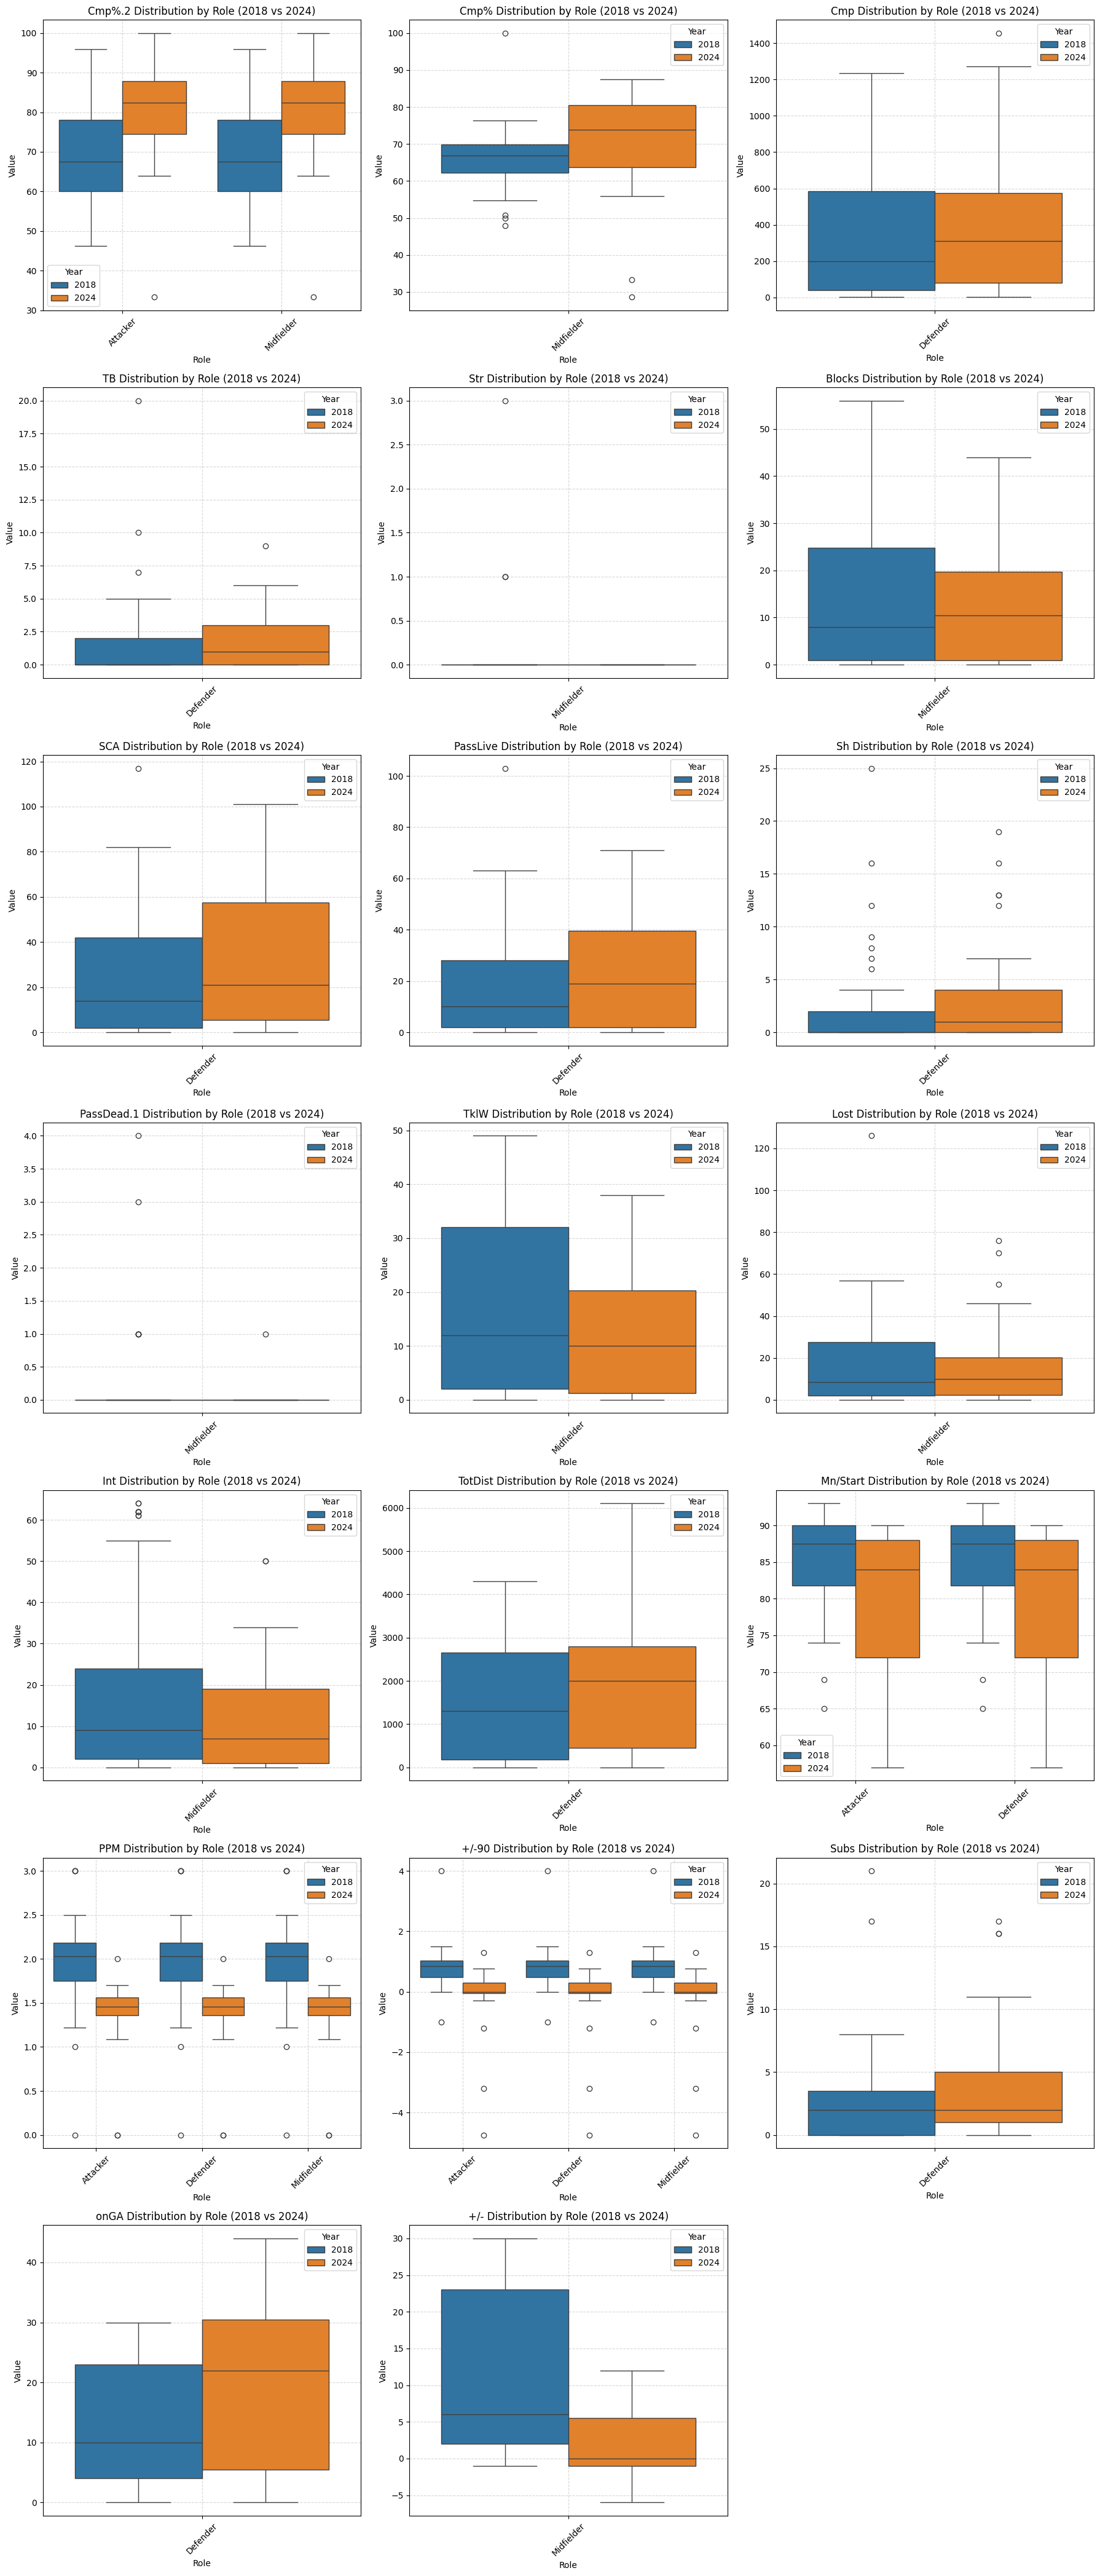

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert list to DataFrame for plotting
boxplot_df = pd.DataFrame(boxplot_data)

# Custom color palette for better visibility
custom_palette = {2018: "#1f77b4", 2024: "#ff7f0e"}  # Blue for 2018, Orange for 2024

# Loop through each unique metric to create a separate plot
unique_metrics = boxplot_df["Metric"].unique()

num_cols = 3  # Number of graphs per row
num_rows = -(-len(unique_metrics) // num_cols)  # Calculate required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, metric in enumerate(unique_metrics):
    metric_df = boxplot_df[boxplot_df["Metric"] == metric]
    
    if not metric_df.empty:
        sns.boxplot(
            x="Role", y="Value", hue="Year", data=metric_df, palette=custom_palette, ax=axes[i]
        )
        axes[i].set_title(f"{metric} Distribution by Role (2018 vs 2024)")
        axes[i].set_xlabel("Role")
        axes[i].set_ylabel("Value")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title="Year")
        axes[i].grid(True, linestyle="--", alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
attacker_summary = pd.read_csv('RBNY_yearly_stats/summary_stats/attacker_stats_summary.csv')
print(attacker_summary)

     Metric        Mean         Std                Sheet  Year
0       Age   23.071429    3.852358  standard_stats_2018  2018
1        MP   13.357143   12.701345  standard_stats_2018  2018
2    Starts    8.000000    9.429903  standard_stats_2018  2018
3       Min  803.461538  843.352300  standard_stats_2018  2018
4       90s    8.915385    9.376020  standard_stats_2018  2018
..      ...         ...         ...                  ...   ...
159     1/3   13.333333   13.257074      possession_2024  2024
160     CPA    9.888889    9.980537      possession_2024  2024
161     Mis   29.666667   27.221315      possession_2024  2024
162     Dis   12.333333   11.586630      possession_2024  2024
163     Rec  278.111111  253.108892      possession_2024  2024

[164 rows x 5 columns]


In [ ]:
filtered_data

{'standard_stats_2018':                      Player   Nation    Pos  Age  MP  Starts     Min   90s  \
 0                Aaron Long   us USA     DF   25  34      31  2808.0  31.2   
 1               Luis Robles   us USA     GK   33  31      31  2790.0  31.0   
 2                Sean Davis   us USA     MF   24  32      30  2574.0  28.6   
 3                Tim Parker   us USA     DF   24  29      29  2610.0  29.0   
 4                      Kaku   py PAR     MF   23  30      29  2410.0  26.8   
 5   Bradley Wright-Phillips  eng ENG     FW   32  32      28  2532.0  28.1   
 6            Kemar Lawrence   jm JAM     DF   25  28      27  2436.0  27.1   
 7               Tyler Adams   us USA     MF   18  27      26  2328.0  25.9   
 8              Daniel Royer   at AUT     FW   27  29      24  2042.0  22.7   
 9      Michael Amir Murillo   pa PAN     DF   21  23      21  1936.0  21.5   
 10          Marc Rzatkowski   de GER  MF,FW   27  24      16  1499.0  16.7   
 11              Connor Lade 

In [ ]:
print(filtered_data["passing_2024"])


              Player    Pos   Cmp   Att  Cmp%  TotDist  PrgDist  Cmp.1  Att.1  \
0     Daniel Edelman     MF  1274  1514  84.1    22637     6768    546    618   
1     Carlos Coronel     GK   562   891  63.1    16631    12382     99    101   
2          Noah Eile     DF  1456  1685  86.4    30646    11334    441    480   
3        John Tolkin     DF  1074  1463  73.4    20386     7402    474    536   
4      Dante Vanzeir     FW   271   445  60.9     4003     1023    163    226   
5       Lewis Morgan  FW,MF   517   734  70.4     8493     2321    248    317   
6       Dylan Nealis     DF  1053  1399  75.3    19277     6492    444    525   
7        Sean Nealis     DF  1140  1303  87.5    21591     7487    401    430   
8      Frankie Amaya     MF   684   851  80.4    12435     3880    307    354   
9   Wikelman Carmona  MF,FW   466   603  77.3     7682     2218    248    287   
10      Andrés Reyes     DF   585   725  80.7    11613     4264    181    204   
11      Elias Manoel     FW 

Do correlation between all metrics and ppg to determine which metric predicts the team performance

Maybe look at specific players and their performance based on avgs.
